Measurement outcomes:
{'010': 520, '011': 504}


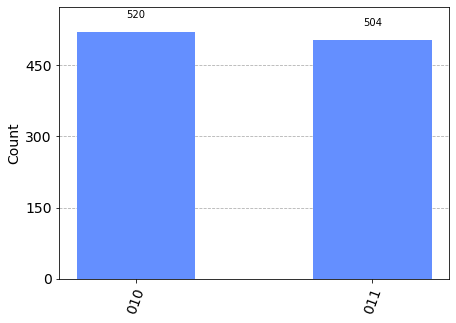

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 3 qubits
qc = QuantumCircuit(3, 3)

# Step 1: Encoding (using 3 qubits to protect 1 logical qubit)
qc.h(0)   # Apply Hadamard gate to qubit 0 (superposition)
qc.cx(0, 1)  # Apply CNOT gate between qubit 0 and qubit 1
qc.cx(0, 2)  # Apply CNOT gate between qubit 0 and qubit 2

# Step 2: Simulate an error (bit-flip error on qubit 1)
qc.x(1)   # Apply X gate (bit-flip) to qubit 1

# Step 3: Error correction
qc.cx(0, 1)  # Apply CNOT gate between qubit 0 and qubit 1
qc.cx(0, 2)  # Apply CNOT gate between qubit 0 and qubit 2
qc.ccx(2, 1, 0)  # Apply Toffoli gate to perform majority vote (error correction)

# Step 4: Measurement
qc.measure([0, 1, 2], [0, 1, 2])  # Measure all qubits and store the result in classical bits

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator).result()

# Get the counts of the measurement outcomes
counts = result.get_counts(qc)

# Plot the measurement outcomes
print("Measurement outcomes:")
print(counts)
plot_histogram(counts)


In [ ]:
Certainly, here's an explanation of the simplified code for bit-flip error correction using the repetition code:

1. `from qiskit import QuantumCircuit, Aer, execute`: Import the necessary components from Qiskit. `QuantumCircuit` is used to create quantum circuits, `Aer` is used to select the simulator backend, and `execute` is used to run the circuit.

2. `from qiskit.visualization import plot_histogram`: Import the function `plot_histogram` to visualize measurement outcomes.

3. `qc = QuantumCircuit(3, 3)`: Create a quantum circuit named `qc` with 3 quantum qubits and 3 classical bits. This line sets up the circuit structure.

4. `qc.h(0)`: Apply a Hadamard gate (H gate) to the first qubit (qubit 0). This puts the qubit into a superposition state, which is the initial step of encoding.

5. `qc.cx(0, 1)`: Apply a CNOT gate (controlled-X gate) between qubit 0 and qubit 1. This entangles qubits 0 and 1.

6. `qc.cx(0, 2)`: Apply another CNOT gate between qubit 0 and qubit 2. This entangles all three qubits. These steps represent the encoding, where three qubits are used to protect one logical qubit.

7. `qc.x(1)`: Simulate an error by applying an X gate (bit-flip gate) to qubit 1, introducing a bit-flip error.

8. `qc.cx(0, 1)`: Apply a CNOT gate between qubit 0 and qubit 1 again, starting the error correction process.

9. `qc.cx(0, 2)`: Similarly, apply a CNOT gate between qubit 0 and qubit 2 to prepare for error correction.

10. `qc.ccx(2, 1, 0)`: Apply a Toffoli gate (CCX gate) to perform majority vote-based error correction. If the majority of qubits 0, 1, and 2 disagree, it corrects the error.

11. `qc.measure([0, 1, 2], [0, 1, 2])`: Measure all three qubits and store the measurement results in corresponding classical bits.

12. `simulator = Aer.get_backend('qasm_simulator')`: Select the Qiskit Aer simulator as the backend for simulating the quantum circuit.

13. `result = execute(qc, simulator).result()`: Execute the quantum circuit `qc` on the selected simulator and obtain the simulation result.

14. `counts = result.get_counts(qc)`: Retrieve the counts of measurement outcomes from the simulation result. This tells you how often each possible outcome occurred.

15. `print("Measurement outcomes:")`: Print a message to indicate that the following output shows measurement outcomes.

16. `print(counts)`: Print the counts of measurement outcomes, which indicate the success of error correction.

17. `plot_histogram(counts)`: Visualize the measurement outcomes in a histogram, allowing you to see how well the error correction process worked.